# Laboratorium 7: Restricted Boltzmann Machines i Deep Belief Networks

## 5 Ekstrakcja cech za pomocą Restricted Boltzmann Machine

* Wczytaj zbiór danych. Są to obrazy w skali szarości, przypisane do jednej z wielu
klas, z pre-definiowanym podziałem na zbiór treningowy i testowy (w przypadku
MNIST oraz Fashion-MNIST jest to 60000 rekordów treningowych i 10000 testowych).


In [95]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
(f_x_train, f_y_train), (f_x_test, f_y_test) = tf.keras.datasets.fashion_mnist.load_data()


In [96]:
k_x_train = np.load("kmnist-train-imgs.npz")['arr_0']
k_y_train = np.load("kmnist-train-labels.npz")['arr_0']
k_x_test = np.load("kmnist-test-imgs.npz")['arr_0']
k_y_test = np.load("kmnist-test-labels.npz")['arr_0']

In [97]:
# data for MNIST
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)
print(f"Labels: {np.unique(y_train)}")

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)
Labels: [0 1 2 3 4 5 6 7 8 9]


In [98]:
# data for FASHION-MNIST
print(f_x_train.shape)
print(f_y_train.shape)
print(f_x_test.shape)
print(f_y_test.shape)
print(f"Labels: {np.unique(f_y_train)}")

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)
Labels: [0 1 2 3 4 5 6 7 8 9]


In [99]:
# data for Kuzushiji-MNIST
print(k_x_train.shape)
print(k_y_train.shape)
print(k_x_test.shape)
print(k_y_test.shape)
print(f"Labels: {np.unique(k_y_train)}")

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)
Labels: [0 1 2 3 4 5 6 7 8 9]


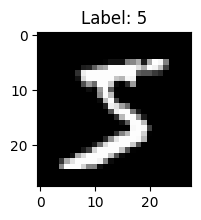

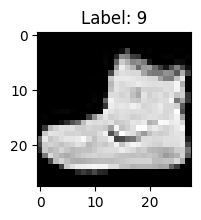

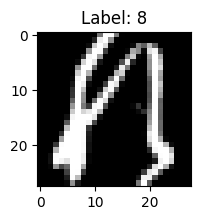

In [100]:
plt.figure(figsize=(2,2))
plt.imshow(x_train[0], cmap='gray')
plt.title(f"Label: {y_train[0]}")
plt.show()

plt.figure(figsize=(2,2))
plt.imshow(f_x_train[0], cmap='gray')
plt.title(f"Label: {f_y_train[0]}")
plt.show()

plt.figure(figsize=(2,2))
plt.imshow(k_x_train[0], cmap='gray')
plt.title(f"Label: {k_y_train[0]}")
plt.show()

* Dokonaj binaryzacji1 obrazów (zarówno zbiór treningowy, jak i testowy), a następnie wyświel 10 przykładowych rekordów ze zbioru treningowego.

* Dokonaj konwersji danych na tablice numpy

In [101]:
from sklearn.preprocessing import binarize

def binarize_mnist(data):
  result = []
  for image in data:
    result.append(binarize(image, threshold=127))
  return result

def binarize_for_mnist():
  b_x_train = binarize_mnist(x_train)
  b_x_test = binarize_mnist(x_test)
  return np.array(b_x_train).astype(np.uint8), np.array(b_x_test).astype(np.uint8)

def binarize_for_f_mnist():
  b_f_x_train = binarize_mnist(f_x_train)
  b_f_x_test = binarize_mnist(f_x_test)
  return np.array(b_f_x_train).astype(np.uint8), np.array(b_f_x_test).astype(np.uint8)

def binarize_for_k_mnist():
  b_k_x_train = binarize_mnist(k_x_train)
  b_k_x_test = binarize_mnist(k_x_test)
  return np.array(b_k_x_train).astype(np.uint8), np.array(b_k_x_test).astype(np.uint8)

In [102]:
b_x_train, b_x_test = binarize_for_mnist()
b_f_x_train, b_f_x_test = binarize_for_f_mnist()
b_k_x_train, b_k_x_test = binarize_for_k_mnist()

y_train = np.array(y_train).astype(np.uint8)
y_test = np.array(y_test).astype(np.uint8)

f_y_train = np.array(f_y_train).astype(np.uint8)
f_y_test = np.array(f_y_test).astype(np.uint8)

k_y_train = np.array(k_y_train).astype(np.uint8)
k_y_test = np.array(k_y_test).astype(np.uint8)


In [9]:
def plot_ten_images(x_data, y_data, lbl='Label'):
  plt.figure(figsize=(10, 5))
  for i in range(10):
      plt.subplot(2, 5, i + 1)
      plt.imshow(x_data[i], cmap='gray')
      plt.title(f"{lbl}: {y_data[i]}")
      plt.axis('off')

  plt.tight_layout()
  plt.show()

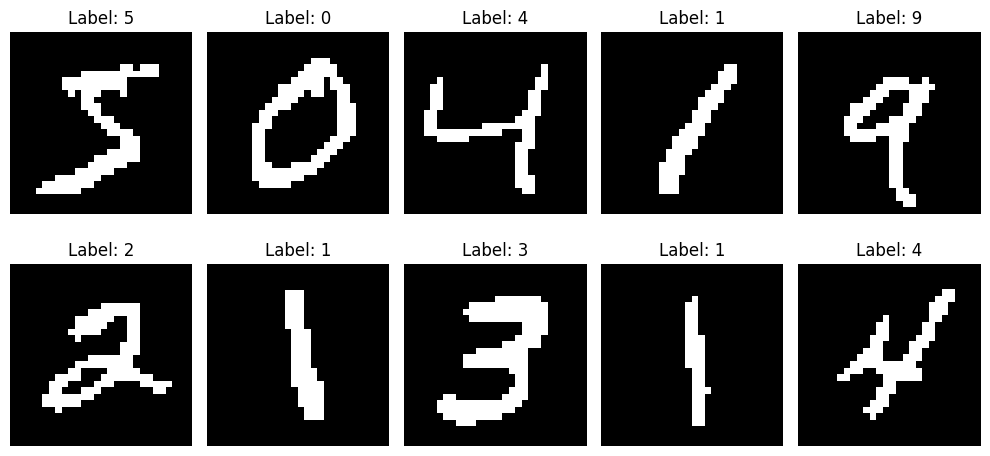

In [10]:
plot_ten_images(b_x_train, y_train)

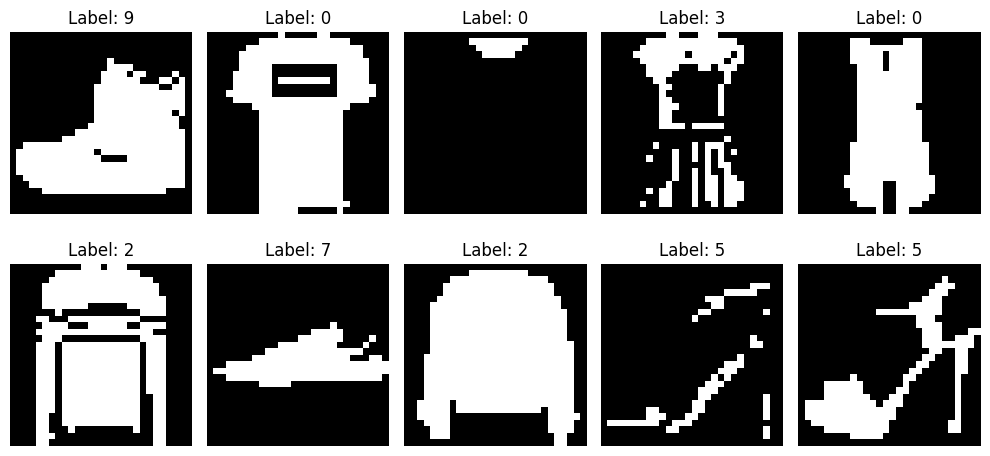

In [11]:
plot_ten_images(b_f_x_train, f_y_train)

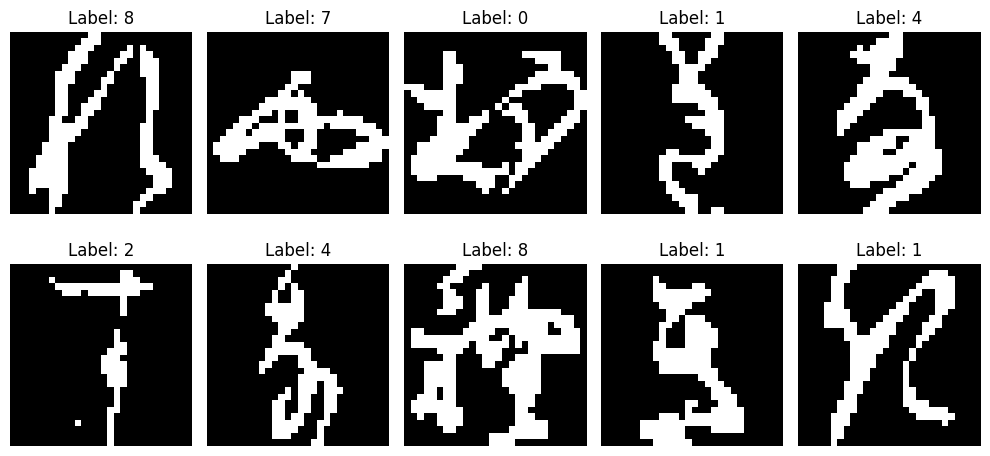

In [12]:
plot_ten_images(b_k_x_train, k_y_train)

In [103]:
# Prepare data
# Flatten images
b_x_train = b_x_train.reshape(-1, 28 * 28)
b_x_test = b_x_test.reshape(-1, 28 * 28)

b_f_x_train = b_f_x_train.reshape(-1, 28 * 28)
b_f_x_test = b_f_x_test.reshape(-1, 28 * 28)

b_k_x_train = b_k_x_train.reshape(-1, 28 * 28)
b_k_x_test = b_k_x_test.reshape(-1, 28 * 28)

# Scale images to [0, 1]
x_train = x_train.astype(np.float32)/255.0
x_train = x_train.reshape(-1, 28*28)

f_x_train = f_x_train.astype(np.float32)/255.0
f_x_train = f_x_train.reshape(-1, 28*28)

k_x_train = k_x_train.astype(np.float32)/255.0
k_x_train = k_x_train.reshape(-1, 28*28)

x_test = x_test.astype(np.float32) / 255.0
x_test = x_test.reshape(-1, 28*28)

f_x_test = f_x_test.astype(np.float32) / 255.0
f_x_test = f_x_test.reshape(-1, 28*28)

k_x_test = k_x_test.astype(np.float32) / 255.0
k_x_test = k_x_test.reshape(-1, 28*28)

* Zbuduj Pipeline złożony z:\
– BernoulliRBM do ekstrakcji cech\
– LogisticRegression jako klasyfikatora

In [14]:
from sklearn.neural_network import BernoulliRBM
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

In [15]:
baseline_classifier = LogisticRegression()
pipe = Pipeline([('rbm', BernoulliRBM(n_components=50, n_iter=2)), ('regression', LogisticRegression())])
f_pipe = Pipeline([('rbm', BernoulliRBM(n_components=50, n_iter=2)), ('regression', LogisticRegression())])
k_pipe = Pipeline([('rbm', BernoulliRBM(n_components=50, n_iter=2)), ('regression', LogisticRegression())])

In [16]:
pipe.fit(b_x_train, y_train).score(b_x_test, y_test)

/home/adrian/dev/um-labs/lab_RBM/.venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8947

In [17]:
pipe2 = Pipeline([('rbm', BernoulliRBM(n_components=50, n_iter=10)), ('regression', LogisticRegression())])
pipe2.fit(b_x_train, y_train).score(b_x_test, y_test)

/home/adrian/dev/um-labs/lab_RBM/.venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8961

In [18]:
f_pipe.fit(b_f_x_train, f_y_train).score(b_f_x_test, f_y_test)

/home/adrian/dev/um-labs/lab_RBM/.venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.7227

In [19]:
k_pipe.fit(b_f_x_train, f_y_train).score(b_f_x_test, f_y_test)

/home/adrian/dev/um-labs/lab_RBM/.venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.7144

* Dostrój hiperparametry modelu korzystając z wyszukiwania siatkowego i walidacji
krzyżowej (GridSearchCV). Siatkę parametrów możesz dobrać stosowanie do zbioru danych i dostępnych zasobów obliczeniowych. Przykładowa siatka znajduje się
poniżej.

In [22]:
param_grid = {
    'rbm__n_components': [70, 80, 90],
    'rbm__learning_rate': [0.05, 0.1],
    'rbm__batch_size': [10, 20],
    'rbm__n_iter': [5],
    'regression__C': [0.1, 0.5, 1.0]
}

In [ ]:
grid_search = GridSearchCV(
    estimator=pipe,
    param_grid=param_grid,
    scoring='accuracy',
    cv=5,
    verbose=2,
    n_jobs=5
)

grid_search.fit(b_x_train, y_train)

print("Best params:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

In [24]:
print("Best params:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

Best params: {'rbm__batch_size': 20, 'rbm__learning_rate': 0.05, 'rbm__n_components': 90, 'rbm__n_iter': 5, 'regression__C': 1.0}
Best score: 0.9215833333333332


In [ ]:
f_grid_search = GridSearchCV(
    estimator=f_pipe,
    param_grid=param_grid,
    scoring='accuracy',
    cv=5,
    verbose=2,
    n_jobs=5
)

f_grid_search.fit(b_f_x_train, f_y_train)

In [26]:
print("Best params:", f_grid_search.best_params_)
print("Best score:", f_grid_search.best_score_)

Best params: {'rbm__batch_size': 20, 'rbm__learning_rate': 0.05, 'rbm__n_components': 90, 'rbm__n_iter': 5, 'regression__C': 1.0}
Best score: 0.7785833333333334


In [ ]:
k_grid_search = GridSearchCV(
    estimator=k_pipe,
    param_grid=param_grid,
    scoring='accuracy',
    cv=5,
    verbose=2,
    n_jobs=5
)

k_grid_search.fit(b_k_x_train, k_y_train)

In [28]:
print("Best params:", k_grid_search.best_params_)
print("Best score:", k_grid_search.best_score_)

Best params: {'rbm__batch_size': 10, 'rbm__learning_rate': 0.1, 'rbm__n_components': 90, 'rbm__n_iter': 5, 'regression__C': 0.5}
Best score: 0.8454666666666666


* Przedstaw i skomentuj otrzymane wartości hiperparametrów, a następnie wytrenuj
zgodnie z nimi RBM i klasyfikator.

### Komentarz do wyników hiperparametrów:
Dla zbiorów MNIST i F-MNIST batch-size zostały wybrany większy co daje większą stabilizację obliczeń, a learning-rate mniejszy więc uczenie będzie dokładniejsze.\
Ilość n_components dla każdego z przypadków została wybrana największa. Łatwiej dokonać ekstrakcji cech przy większej ilości komponentów. Wtedy uczenie staje się \dokładniejsze. Ilość iteracji została ustalona na 5, ponieważ wtedy są szybsze obliczenia. Domyślna wartość to 10 i dla ostatecznych wyników taka została ustalona.\
Dla K-MNIST parametry batch-size, learning-rate i regression_C zostały wybrane nieco inne i dla nich best score wyszedł większy, ale po testowaniu tych parametrów to nie potwierdza się w poniższych wynikach (tutaj best score 0.845, a poniżej 0.7285), dlatego nie rozumiem jak to się stało.

In [29]:
pipe = Pipeline([('rbm', BernoulliRBM(n_components=grid_search.best_params_['rbm__n_components'], batch_size=grid_search.best_params_['rbm__batch_size'], learning_rate=grid_search.best_params_['rbm__learning_rate'], n_iter=10)), ('regression', LogisticRegression(C=grid_search.best_params_['regression__C']))])
f_pipe = Pipeline([('rbm', BernoulliRBM(n_components=f_grid_search.best_params_['rbm__n_components'], batch_size=f_grid_search.best_params_['rbm__batch_size'], learning_rate=f_grid_search.best_params_['rbm__learning_rate'], n_iter=10)), ('regression', LogisticRegression(C=f_grid_search.best_params_['regression__C']))])
k_pipe = Pipeline([('rbm', BernoulliRBM(n_components=k_grid_search.best_params_['rbm__n_components'], batch_size=k_grid_search.best_params_['rbm__batch_size'], learning_rate=k_grid_search.best_params_['rbm__learning_rate'], n_iter=10)), ('regression', LogisticRegression(C=k_grid_search.best_params_['regression__C']))])

In [30]:
pipe.fit(b_x_train, y_train).score(b_x_test, y_test)

/home/adrian/dev/um-labs/lab_RBM/.venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9266

In [38]:
f_pipe.fit(b_f_x_train, f_y_train).score(b_f_x_test, f_y_test)

/home/adrian/dev/um-labs/lab_RBM/.venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.779

In [41]:
k_pipe.fit(b_k_x_train, k_y_train).score(b_k_x_test, k_y_test)

0.7285

In [42]:
k_pipe_from_grid = k_grid_search.best_estimator_
k_pipe_from_grid.score(b_k_x_test, k_y_test)

0.7238

* Dokonaj klasyfikacji na zbiorze testowym i przedstaw szczegółowo wyniki (accuracy, precision, recall, f1-score):\
– Na poziomie każdej klasy\
– Zbiorcze

In [33]:
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score

def result_scores(y_true, y_pred):
  res_acc = accuracy_score(y_true, y_pred, )
  res_recall = recall_score(y_true, y_pred, average='micro')
  res_f1 = f1_score(y_true, y_pred, average='micro')
  res_prec = precision_score(y_true, y_pred, average='micro')

  print(f"Results: ")
  print(f"\tAccuracy: {res_acc}")
  print(f"\tRecall: {res_recall}")
  print(f"\tF1-score: {res_f1}")
  print(f"\tPrecision: {res_prec}")

In [34]:
# Extract classes
def extract_classes(y_data):
  mnist_classes = np.unique(y_data)
  indices_of_mnist_classes = {
      "0": [],
      "1": [],
      "2": [],
      "3": [],
      "4": [],
      "5": [],
      "6": [],
      "7": [],
      "8": [],
      "9": []
  }

  amount_of_elements = 0
  for nr_class in mnist_classes:
      indices_of_mnist_classes[str(nr_class)] = np.argwhere(y_data == nr_class).reshape(-1)
      amount_of_elements += len(indices_of_mnist_classes[str(nr_class)])

  assert amount_of_elements == len(y_data)

  return indices_of_mnist_classes

In [35]:
y_test_classes = extract_classes(y_test)
f_y_test_classes = extract_classes(f_y_test)
k_y_test_classes = extract_classes(k_y_test)

In [48]:
def results_for_every_class(model, x_data, y_data):
  data_classes = np.unique(y_data)
  indices_classes = extract_classes(y_data)

  for single_class in data_classes:
    print(f"Class: {single_class}")
    y_pred = model.predict(x_data[indices_classes[str(single_class)]])
    result_scores(y_data[indices_classes[str(single_class)]], y_pred)


In [49]:
print(f"For MNIST dataset:")
print(f"Baseline: ")
baseline_classifier.fit(x_train, y_train)
y_pred_baseline = baseline_classifier.predict(x_test)
result_scores(y_test, y_pred_baseline)

print(f"For classes: ")
results_for_every_class(pipe, b_x_test, y_test)

print(f"For all:")
y_pred_all = pipe.predict(b_x_test)
result_scores(y_test, y_pred_all)


For MNIST dataset:
Baseline: 


/home/adrian/dev/um-labs/lab_RBM/.venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Results: 
	Accuracy: 0.9256
	Recall: 0.9256
	F1-score: 0.9256
	Precision: 0.9256
For classes: 
Class: 0
Results: 
	Accuracy: 0.9744897959183674
	Recall: 0.9744897959183674
	F1-score: 0.9744897959183674
	Precision: 0.9744897959183674
Class: 1
Results: 
	Accuracy: 0.9823788546255506
	Recall: 0.9823788546255506
	F1-score: 0.9823788546255506
	Precision: 0.9823788546255506
Class: 2
Results: 
	Accuracy: 0.9127906976744186
	Recall: 0.9127906976744186
	F1-score: 0.9127906976744186
	Precision: 0.9127906976744186
Class: 3
Results: 
	Accuracy: 0.9089108910891089
	Recall: 0.9089108910891089
	F1-score: 0.9089108910891089
	Precision: 0.9089108910891089
Class: 4
Results: 
	Accuracy: 0.9276985743380856
	Recall: 0.9276985743380856
	F1-score: 0.9276985743380856
	Precision: 0.9276985743380856
Class: 5
Results: 
	Accuracy: 0.874439461883408
	Recall: 0.874439461883408
	F1-score: 0.874439461883408
	Precision: 0.874439461883408
Class: 6
Results: 
	Accuracy: 0.9561586638830898
	Recall: 0.9561586638830898
	F1-

In [53]:
print(f"For FASHION-MNIST dataset:")
print(f"Baseline: ")
baseline_classifier.fit(f_x_train, f_y_train)
f_y_pred_baseline = baseline_classifier.predict(f_x_test)
result_scores(f_y_test, f_y_pred_baseline)

print(f"For classes: ")
results_for_every_class(f_pipe, b_f_x_test, f_y_test)

print(f"For all:")
f_y_pred_all = f_pipe.predict(b_f_x_test)
result_scores(f_y_test, f_y_pred_all)

For FASHION-MNIST dataset:
Baseline: 


/home/adrian/dev/um-labs/lab_RBM/.venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Results: 
	Accuracy: 0.8438
	Recall: 0.8438
	F1-score: 0.8438
	Precision: 0.8438
For classes: 
Class: 0
Results: 
	Accuracy: 0.744
	Recall: 0.744
	F1-score: 0.744
	Precision: 0.744
Class: 1
Results: 
	Accuracy: 0.946
	Recall: 0.946
	F1-score: 0.946
	Precision: 0.946
Class: 2
Results: 
	Accuracy: 0.623
	Recall: 0.623
	F1-score: 0.623
	Precision: 0.623
Class: 3
Results: 
	Accuracy: 0.813
	Recall: 0.813
	F1-score: 0.813
	Precision: 0.813
Class: 4
Results: 
	Accuracy: 0.738
	Recall: 0.738
	F1-score: 0.738
	Precision: 0.738
Class: 5
Results: 
	Accuracy: 0.869
	Recall: 0.869
	F1-score: 0.869
	Precision: 0.869
Class: 6
Results: 
	Accuracy: 0.4
	Recall: 0.4
	F1-score: 0.4
	Precision: 0.4
Class: 7
Results: 
	Accuracy: 0.834
	Recall: 0.834
	F1-score: 0.834
	Precision: 0.834
Class: 8
Results: 
	Accuracy: 0.914
	Recall: 0.914
	F1-score: 0.914
	Precision: 0.914
Class: 9
Results: 
	Accuracy: 0.909
	Recall: 0.909
	F1-score: 0.909
	Precision: 0.909
For all:
Results: 
	Accuracy: 0.779
	Recall: 0.779
	F

In [52]:
print(f"For K-MNIST dataset:")
print(f"Baseline: ")
baseline_classifier.fit(k_x_train, k_y_train)
k_y_pred_baseline = baseline_classifier.predict(k_x_test)
result_scores(k_y_test, k_y_pred_baseline)

print(f"For classes: ")
results_for_every_class(k_pipe, b_k_x_test, k_y_test)

print(f"For all:")
k_y_pred_all = k_pipe.predict(b_k_x_test)
result_scores(k_y_test, k_y_pred_all)

For K-MNIST dataset:
Baseline: 


/home/adrian/dev/um-labs/lab_RBM/.venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Results: 
	Accuracy: 0.6965
	Recall: 0.6965
	F1-score: 0.6965
	Precision: 0.6965
For classes: 
Class: 0
Results: 
	Accuracy: 0.785
	Recall: 0.785
	F1-score: 0.785
	Precision: 0.785
Class: 1
Results: 
	Accuracy: 0.733
	Recall: 0.733
	F1-score: 0.733
	Precision: 0.733
Class: 2
Results: 
	Accuracy: 0.642
	Recall: 0.642
	F1-score: 0.642
	Precision: 0.642
Class: 3
Results: 
	Accuracy: 0.777
	Recall: 0.777
	F1-score: 0.777
	Precision: 0.777
Class: 4
Results: 
	Accuracy: 0.694
	Recall: 0.694
	F1-score: 0.694
	Precision: 0.694
Class: 5
Results: 
	Accuracy: 0.742
	Recall: 0.742
	F1-score: 0.742
	Precision: 0.742
Class: 6
Results: 
	Accuracy: 0.762
	Recall: 0.762
	F1-score: 0.762
	Precision: 0.762
Class: 7
Results: 
	Accuracy: 0.666
	Recall: 0.666
	F1-score: 0.666
	Precision: 0.666
Class: 8
Results: 
	Accuracy: 0.752
	Recall: 0.752
	F1-score: 0.752
	Precision: 0.752
Class: 9
Results: 
	Accuracy: 0.732
	Recall: 0.732
	F1-score: 0.732
	Precision: 0.732
For all:
Results: 
	Accuracy: 0.7285
	Recall:

* Czy nieliniowa ekstrakcja cech za pomocą RBM poprawia wyniki klasyfikacji w
porównaniu z baseline (regresja logistyczna na surowych pikselach)?

### Odpowiedź:
Dla zbiorów danych MNIST i K-MNIST wyniki klasyfikacji zostały poprawione. Dla F-MNIST nie udało się poprawić wyników. Dla poszczególnych cech było różnie, czasami były poprawy względem baseline-u, a czasami nie.

* Przedstaw wizualizację wszystkich ekstrachowanych cech ukrytych (n components
obrazów odpowiadających wyuczonym wagom łączącym się z określonym elementem warstwy ukrytej). Spróbuj rozpoznać jakie wysokopoziomowe cechy obrazu są
wzmacniane przez określony komponent.

In [63]:
def visualize_features(components):
  print(components.shape)
  image_shape = (28, 28)
  reshaped_components = components.reshape(-1, *image_shape)
  plt.figure(figsize=(10, 10))
  for i in range(reshaped_components.shape[0]):
      plt.subplot(reshaped_components.shape[0]//10, 10, i + 1)
      plt.imshow(reshaped_components[i], cmap='gray')
      plt.title(f"{i}")
      plt.axis('off')

  plt.tight_layout()
  plt.show()

Components for MNIST dataset:

(90, 784)


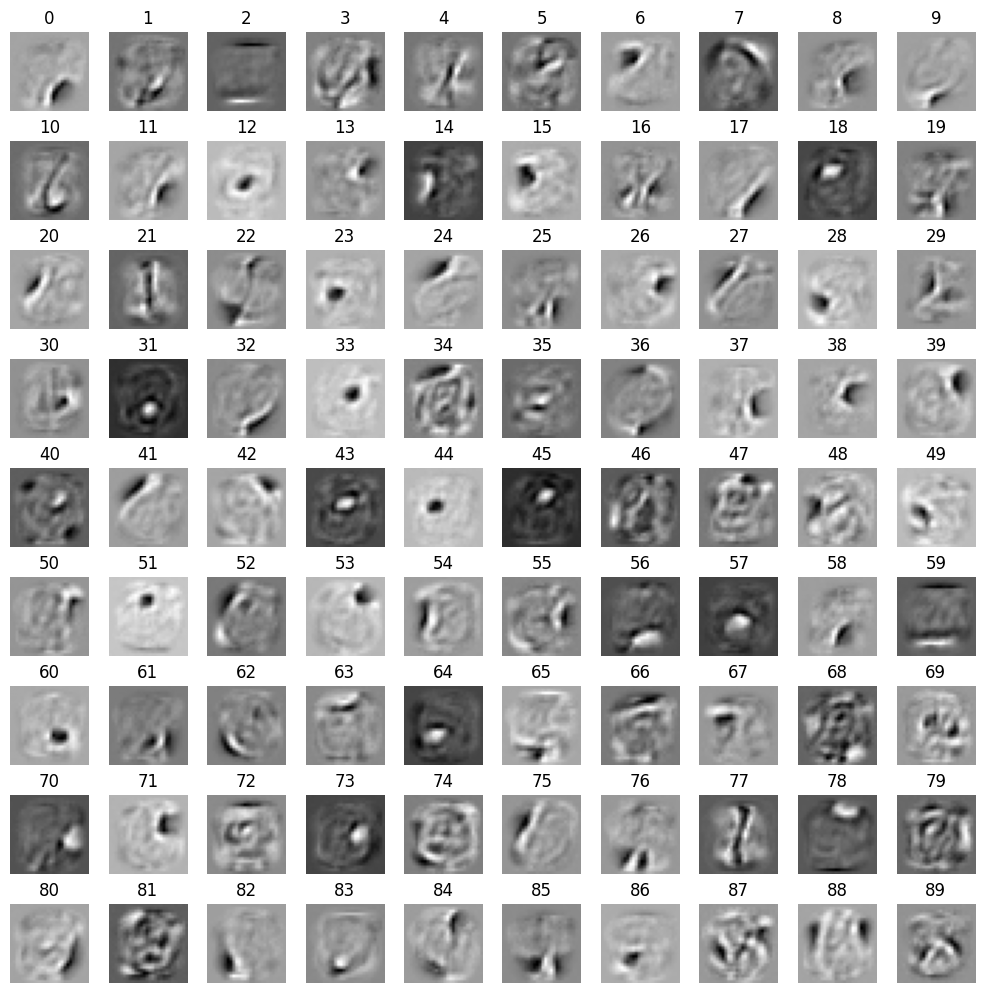

In [64]:
visualize_features(pipe['rbm'].components_)

Components for F-MNIST dataset:

(90, 784)


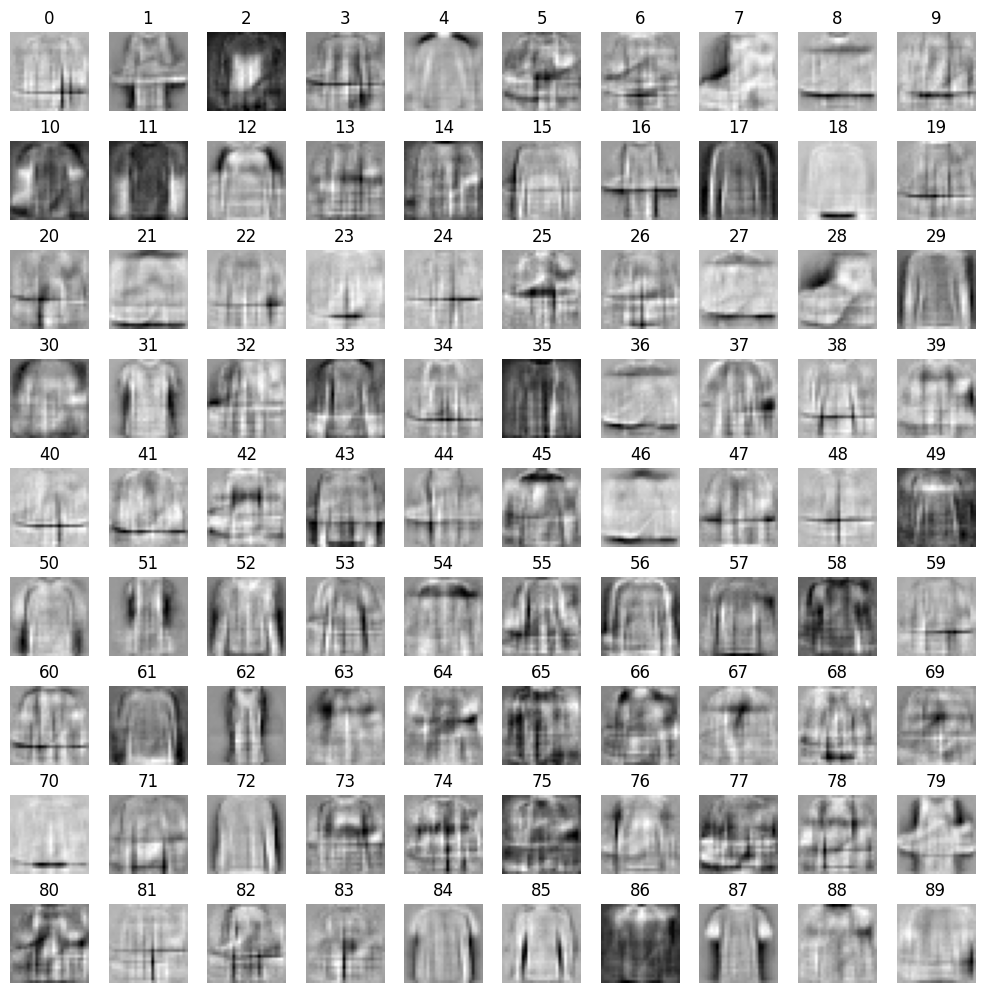

In [65]:
visualize_features(f_pipe['rbm'].components_)

Components for K-MNIST dataset:

(90, 784)


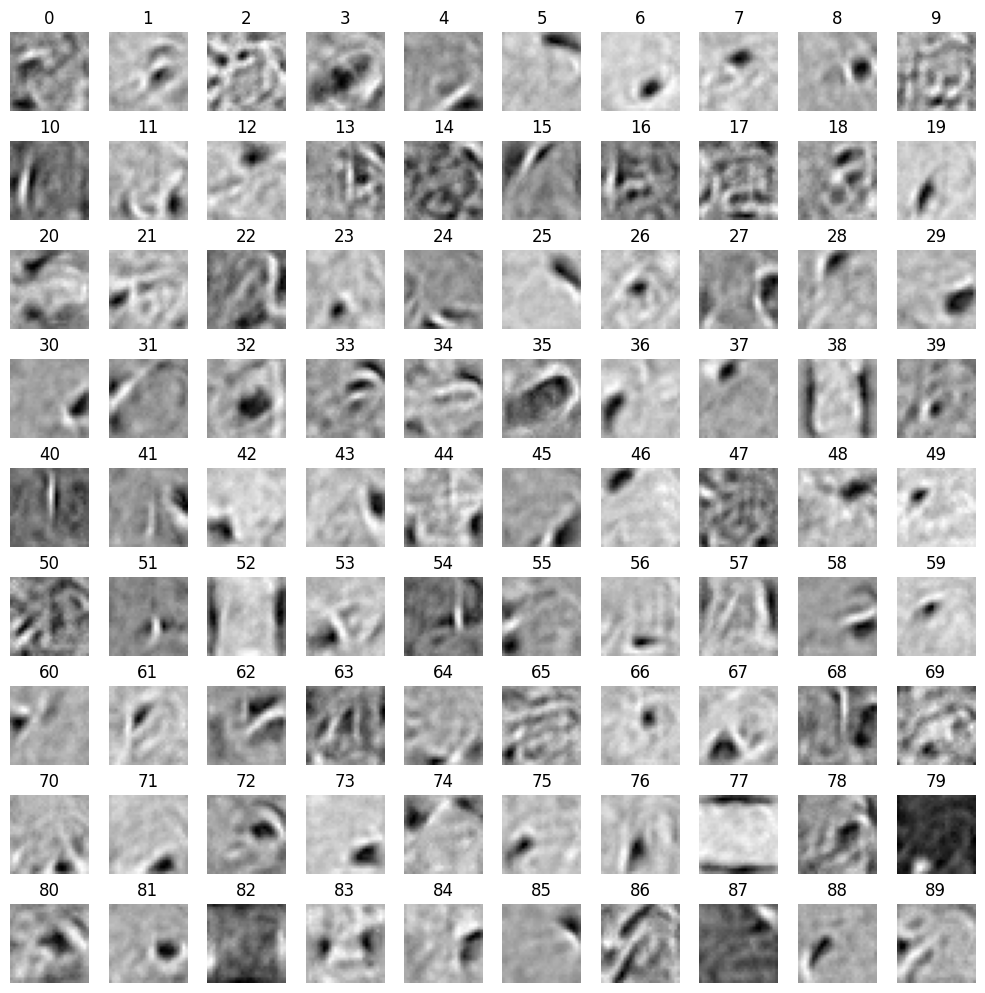

In [66]:
visualize_features(k_pipe['rbm'].components_)

Dla poszczególnych komponentów widać czasami cechy jakie są wykrywane przez model np. są to ubrania jak koszule.

# 6 Hierarchiczna ekstrakcja cech za pomocą Deep Belief Network

1. Skonfiguruj 3 RBM w ten sposób, że warstwa ekstrakcji cech (hidden layer ) RBM(i)
staje się warstwą wejściową (visible layer ) BRM(i + 1). RBMy trenowane są w
sekwencyjnie: 1, 2, 3.

2. Rozmiar warstwy ukrytej jest pre-definiowany, przykładowo dla MNIST proponujemy kolejno: 256, 128, 64. Dla innych zbiorów danych rozmiary te możesz dopasować
empirycznie, przy czym nie jest wymagane zastosowanie wyszukiwania siatkowego
(duże wymagania obliczeniowe). Wartości pozostałych hiperparametrów mogą być
podobne jak w poprzednim zadaniu.

In [69]:
def dbn_for_dataset(x_train_data, y_train_data, x_test_data, y_test_data):
  rbm1 = BernoulliRBM(n_components=256, learning_rate=0.05, n_iter=7, random_state=42)
  rbm2 = BernoulliRBM(n_components=128, learning_rate=0.05, n_iter=7, random_state=42)
  rbm3 = BernoulliRBM(n_components=64, learning_rate=0.05, n_iter=7, random_state=42)
  regression_classifier = LogisticRegression(max_iter=1000, random_state=42)

  rbm1.fit(x_train_data)
  x_rbm1 = rbm1.transform(x_train_data)

  x_test_rbm1 = rbm1.transform(x_test_data)
  regression_classifier.fit(x_rbm1, y_train_data)
  y_pred_rbm1 = regression_classifier.predict(x_test_rbm1)

  rbm2.fit(x_rbm1)
  x_rbm2 = rbm2.transform(x_rbm1)

  x_test_rbm2 = rbm2.transform(x_test_rbm1)
  regression_classifier.fit(x_rbm2, y_train_data)
  y_pred_rbm2 = regression_classifier.predict(x_test_rbm2)

  rbm3.fit(x_rbm2)
  x_rbm3 = rbm3.transform(x_rbm2)

  x_test_rbm3 = rbm3.transform(x_test_rbm2)
  regression_classifier.fit(x_rbm3, y_train_data)
  y_pred_rbm3 = regression_classifier.predict(x_test_rbm3)

  print(f"Scores for first RBM: ")
  result_scores(y_test_data, y_pred_rbm1)
  print(f"Scores for first & second RBM: ")
  result_scores(y_test_data, y_pred_rbm2)
  print(f"Scores for DBN: ")
  result_scores(y_test_data, y_pred_rbm3)

3. Porównaj wyniki klasyfikacji uzyskane z zastosowaniem regresji logistycznej, dla
poniższych wariantów ekstrakcji cech:\
• Baseline - regresja logistyczna na surowych pikselach\
• Pełna hierarchiczna ekstrakcja (wszystkie 3 RBMy)\
• Pierwszy RBM\
• Pierwszy i drugi RBM

In [70]:
def baseline(x_train_data, y_train_data, x_test_data, y_test_data):
  regression_classifier = LogisticRegression(max_iter=1000, random_state=42)
  regression_classifier.fit(x_train_data, y_train_data)

  y_pred = regression_classifier.predict(x_test_data)
  print(f"Scores for baseline: ")
  result_scores(y_test_data, y_pred)

In [71]:
print(f"Baseline for MNIST:")
baseline(x_train, y_train, x_test, y_test)
print(f"Results for MNIST dataset: ")
dbn_for_dataset(b_x_train, y_train, b_x_test, y_test)

print(f"Baseline for F-MNIST:")
baseline(f_x_train, f_y_train, f_x_test, f_y_test)
print(f"Results for FASHION-MNIST dataset: ")
dbn_for_dataset(b_f_x_train, f_y_train, b_f_x_test, f_y_test)

print(f"Baseline for K-MNIST:")
baseline(k_x_train, k_y_train, k_x_test, k_y_test)
print(f"Results for K-MNIST dataset: ")
dbn_for_dataset(b_k_x_train, k_y_train, b_k_x_test, k_y_test)

Baseline for MNIST:
Scores for baseline: 
Results: 
	Accuracy: 0.9263
	Recall: 0.9263
	F1-score: 0.9263
	Precision: 0.9263
Results for MNIST dataset: 
Scores for first RBM: 
Results: 
	Accuracy: 0.9595
	Recall: 0.9595
	F1-score: 0.9595
	Precision: 0.9595
Scores for first & second RBM: 
Results: 
	Accuracy: 0.958
	Recall: 0.958
	F1-score: 0.958
	Precision: 0.958
Scores for DBN: 
Results: 
	Accuracy: 0.943
	Recall: 0.943
	F1-score: 0.943
	Precision: 0.943
Baseline for F-MNIST:
Scores for baseline: 
Results: 
	Accuracy: 0.8432
	Recall: 0.8432
	F1-score: 0.8432
	Precision: 0.8432
Results for FASHION-MNIST dataset: 
Scores for first RBM: 
Results: 
	Accuracy: 0.802
	Recall: 0.802
	F1-score: 0.802
	Precision: 0.802
Scores for first & second RBM: 
Results: 
	Accuracy: 0.7647
	Recall: 0.7647
	F1-score: 0.7647
	Precision: 0.7647
Scores for DBN: 
Results: 
	Accuracy: 0.7232
	Recall: 0.7232
	F1-score: 0.7232
	Precision: 0.7232
Baseline for K-MNIST:
Scores for baseline: 
Results: 
	Accuracy: 0.693

4. Czy ustawianie ekstraktorów RBM jest korzystne dla każdego ze zbiorów danych?
W jaki przypadku hierarchiczna ekstrakcja cech może być przydatna?

Ustawienie ekstraktorów jest korzystne dla zbiorów danych MNIST i K-MNIST. Nawet jeden RBM już znacząco poprawiał wyniki.\
Hierarchiczna ekstrakcja cech jest przydatna, gdy potrzebujemy badać cechy juz w znalezionych cechach w danych.

# 7 ⋆ Restricted Boltzmann Machines: implementacja, testy rekonstrukcji

1. Zaimplementuj RBM wraz z algorytmem trenowania Contrastive Divergence. Możesz użyć następującego szablonu:

In [234]:
import time

def sigmoid(x):
  return 1.0 / (1.0 + np.exp(-x))

class RBM():
  def __init__(self, visible_dim, hidden_dim, learning_rate, gifname='./images/rbm_training.gif'):
    self.visible_dim = visible_dim
    self.hidden_dim = hidden_dim
    self.learning_rate = learning_rate
    self.gif_name = gifname
    self.K = 1

    self.W = np.random.normal(0, 0.01, (visible_dim, hidden_dim)).astype(np.float32)
    self.b = np.zeros(visible_dim)
    self.a = np.zeros(hidden_dim)

  def wake_phase(self, visible):
    preactivation = visible @ self.W
    preactivation = preactivation + np.broadcast_to(self.a, preactivation.shape)
    activation = sigmoid(preactivation)
    binary_activation = activation > np.random.rand(*activation.shape).astype(np.float32)
    return activation, binary_activation

  def dream_phase(self, hidden):
    preactivation = hidden @ self.W.T
    preactivation = preactivation + np.broadcast_to(self.b, preactivation.shape)
    activation = sigmoid(preactivation)
    binary_activation = activation > np.random.rand(*activation.shape).astype(np.float32)
    return activation, binary_activation

  def train(self, batch):
    positive_visible = batch
    positive_hidden, negative_hidden = self.wake_phase(batch)
    negative_visible = self.dream_phase(negative_hidden)[1]

    for k in range(self.K):
      negative_hidden = self.wake_phase(negative_visible)[1]
      negative_visible = self.dream_phase(negative_hidden)[1]

    negative_hidden = self.wake_phase(negative_visible)[0]

    grad_positive = (positive_visible.T @ positive_hidden) / batch.shape[0]
    grad_negative = (negative_visible.T @ negative_hidden) / batch.shape[0]

    self.W += self.learning_rate * (grad_positive - grad_negative)
    return np.mean(np.abs(positive_visible[positive_visible >= 0] - negative_visible[positive_visible >= 0]))

  def fit(self, X, epochs=50, batch_dim=128, lr=0.1):
    self.learning_rate = lr
    test_set = X[0:2*batch_dim]
    for epoch in range(epochs):

      start = time.time()
      train_loss = 0
      s = 0
      for i in range(0, len(X) - batch_dim, batch_dim):
        batch = X[i:i+batch_dim]
        train_loss += self.train(batch)
        s+=1
      stop = time.time()

      reconstruction_error = self.reconstruction_error(test_set)
      print(f"Epoch {epoch+1}, time: {stop - start}, reconstruction_error: {reconstruction_error}, train_loss: {train_loss/s}")
      self.plot_weights(epoch)

  def reconstruction_error(self, X):
    error = X - self.reconstruct(X)
    return np.sum(np.square(error))/X.shape[0]

  def reconstruct(self, X):
    preactivation = X @ self.W 
    preactivation += np.broadcast_to(self.a, preactivation.shape)
    hidden = sigmoid(preactivation)
    hidden = hidden > np.random.rand(*hidden.shape).astype(np.float64)
    preactivation = hidden @ self.W.T
    preactivation += np.broadcast_to(self.b, preactivation.shape)
    visible = sigmoid(preactivation)
    return visible

  def plot_weights(self, epoch):
    filters = np.reshape(np.transpose(self.W), newshape=(self.hidden_dim, 28, 28))
    filters = np.clip(filters, -1, 1)
    fig = plt.figure(figsize=(5, 5))

    for i in range(self.hidden_dim):
      plt.subplot(8, self.hidden_dim//8, i + 1)
      plt.imshow(filters[i], cmap='gray')
      plt.axis('off')

    plt.tight_layout()
    plt.savefig(f'./images/image_at_epoch_{epoch:04d}.png')
    # plt.show()
    plt.close(fig)



2. Wytrenuj RBM na zbiorze Fashion-MNIST (część treningowa) dla warstwy ukrytej (hidden dim) o rozmiarze 40. Zastosuj domyślne wartości parametrów metody
fit().

In [235]:
rbm_f_mnist = RBM(28*28, 40, 0.1)
rbm_f_mnist.fit(b_f_x_train, epochs=30, batch_dim=128)

/tmp/ipykernel_5746/441891556.py:4: RuntimeWarning: overflow encountered in exp
  return 1.0 / (1.0 + np.exp(-x))


Epoch 1, time: 9.231838703155518, reconstruction_error: 77.62876892089844, train_loss: 37.321746341765895
Epoch 2, time: 9.52246880531311, reconstruction_error: 71.9843521118164, train_loss: 29.099820788942576
Epoch 3, time: 13.405994176864624, reconstruction_error: 69.47746276855469, train_loss: 27.572250060130212
Epoch 4, time: 12.423358917236328, reconstruction_error: 68.17606353759766, train_loss: 26.806279864960807
Epoch 5, time: 10.08058476448059, reconstruction_error: 66.76380157470703, train_loss: 26.355702223046677
Epoch 6, time: 9.121027708053589, reconstruction_error: 66.30818176269531, train_loss: 25.963610888816664
Epoch 7, time: 8.778710126876831, reconstruction_error: 66.05725860595703, train_loss: 25.653657565540264
Epoch 8, time: 10.14504861831665, reconstruction_error: 65.95828247070312, train_loss: 25.503535248233934
Epoch 9, time: 11.130028009414673, reconstruction_error: 65.7374267578125, train_loss: 25.414321438962197
Epoch 10, time: 6.259296655654907, reconstruct

3. Zwizualizuj jak zmieniają się wagi w kolejnych epokach treningu. W tym celi wywołuj metodę plot weights() w metodzie fit(). Przedstaw wyniki w formie animowanego pliku GIF. Zapisz obserwacje dotyczące postępów treningu.

In [10]:
import imageio
import glob
import embed
def create_gif():
  with imageio.get_writer('images/rbm_training.gif', mode='I') as writer:
    filenames = glob.glob('images/image*.png')
    filenames = sorted(filenames)
    for filename in filenames:
      image = imageio.imread(filename)
      writer.append_data(image)
    image = imageio.imread(filename)
    writer.append_data(image)
create_gif()

/tmp/ipykernel_7783/1815423369.py:9: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(filename)
/tmp/ipykernel_7783/1815423369.py:11: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(filename)


!["RBM training"](images/rbm_training.gif "segment")

### Obserwacje:
Podczas treningu kształty na obrazkach są coraz smuklejsze i dokładniejsze, a cechy coraz bardziej się uwidaczniają.
### Wnioski:
Podczas trenowania dochodzi do ekstrakcji cech i kształty są coraz lepiej rozpoznawane.

4. Wybierz 10 przykładów ze zbioru testowego (po jedynym dla każdej klasy). Następnie, użyj RBM do rekonstrukcji obrazu testowego. Porównaj otrzymaną rekonstrukcję z obrazem oryginalnym:\
• Przedstaw wizualizację: obraz oryginalny vs. obraz odtworzony na podstawie
wyuczonych wag RBM (dla każdej klasy)\
• Ilościowo: zastosuj Structural Similarity Index (SSIM).

In [239]:
from skimage.metrics import structural_similarity as ssim

f_y_test_classes = extract_classes(f_y_test)

def show_examples(different_classes, x_dataset, y_dataset):
    indices = [different_classes[str(i)][0] for i in range(10)]
    labels = y_dataset[indices]
    reconstructions = rbm_f_mnist.reconstruct(x_dataset[indices])
    reconstructions = np.reshape(reconstructions, newshape=(10, 28, 28))
    reconstructions = np.clip(reconstructions, -1, 1)
    original = np.reshape(x_dataset[indices], newshape=(10, 28, 28))
    print(f"Reconstructed images: ")
    plot_ten_images(reconstructions, labels)
    print(f"Original images: ")
    plot_ten_images(original, labels)
    ssim_indices = []
    differences = []
    for i in range(10):
        ssim_index, diff = ssim(reconstructions[i], original[i], data_range=1, full=True)
        ssim_indices.append(round(ssim_index, 2))
        differences.append(diff)
    plot_ten_images(differences, ssim_indices, "SSIM_index")

    

/tmp/ipykernel_5746/441891556.py:4: RuntimeWarning: overflow encountered in exp
  return 1.0 / (1.0 + np.exp(-x))


Reconstructed images: 


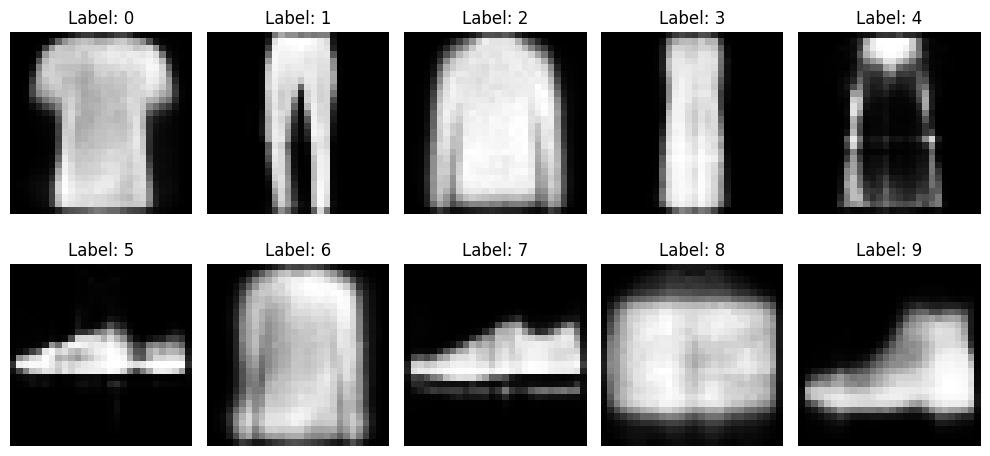

Original images: 


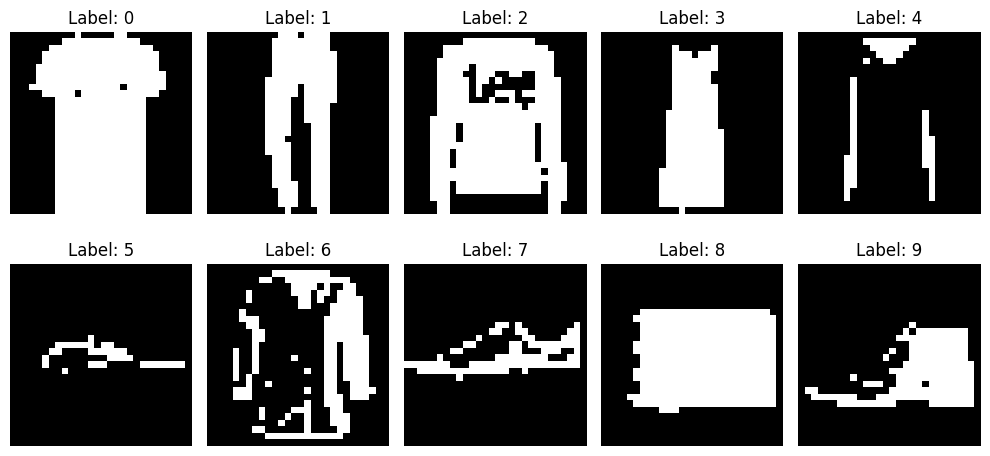

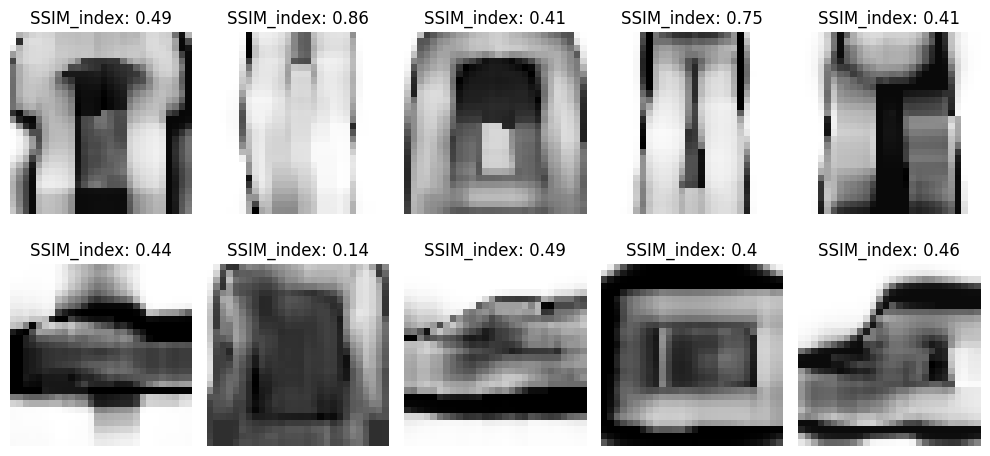

In [240]:
show_examples(f_y_test_classes, b_f_x_test, f_y_test)

5. Skomentuj uzyskane wyniki.

### Komentarz:
Uzyskane wyniki przypominają kształty orginalnych obrazków. Posiadają ich zarys, ale nie są w stanie odzwierciedlać dokładnych szczegółów. SSIM wykazuje podobieństwo na poziomie 0.4 - 0.5, więc są to podobne obrazy, ale tylko do pewnego stopnia.

# 8 Ekstrakcja cech za pomocą Autoencodera

1. Wczytaj zbiór danych. Dokonaj skalowania cech do przedziału [0, 1] oraz konwersji
na tablice numpy (zarówno dane treningowe, jak i testowe).

In [37]:
from sklearn.model_selection import train_test_split
l = len(x_train)
ratio = 1
t_x_train, t_x_val, t_y_train, t_y_val = train_test_split(x_train[:int(ratio*l)], y_train[:int(ratio*l)], test_size=0.2, random_state=41)
t_f_x_train, t_f_x_val, t_f_y_train, t_f_y_val = train_test_split(f_x_train, f_y_train, test_size=0.2, random_state=41)
t_k_x_train, t_k_x_val, t_k_y_train, t_k_y_val = train_test_split(k_x_train, k_y_train, test_size=0.2, random_state=41)

2. Zbuduj i wytrenuj prosty Autoencoder. Przykładowa konfiguracja prostego Autoencodera:\
• Kodowanie: aktywacja ReLU\
• Dekodowanie: aktywacja sigmoidalna\
• Adam optimizer\
• Loss function: binary crossentropy\
• Encoding dimension: 196 (liczba ekstrachowanych cech)\
• Liczba epok treningu: > 30

In [72]:
class Autoencoder(tf.keras.Model):
  def __init__(self, encoding_dimension):
    super(Autoencoder, self).__init__()
    self.encoding_dimension = encoding_dimension
    
    self.encoder = tf.keras.Sequential(
        [
            # tf.keras.layers.Flatten(input_shape=input_shape),
            tf.keras.layers.Dense(784, activation='relu'),
            tf.keras.layers.Dense(128, activation='relu'),
            tf.keras.layers.Dense(64, activation='relu'),
            tf.keras.layers.Dense(32, activation='relu'),
            tf.keras.layers.Dense(self.encoding_dimension)
        ]
    )

    self.decoder = tf.keras.Sequential(
        [
            tf.keras.layers.Dense(self.encoding_dimension, activation='relu'),
            tf.keras.layers.Dense(32, activation='relu'),
            tf.keras.layers.Dense(64, activation='relu'),
            tf.keras.layers.Dense(128, activation='relu'),
            tf.keras.layers.Dense(784, activation='sigmoid'), 
            # tf.keras.layers.Reshape(target_shape=input_shape)
        ]
    )


  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

In [73]:
latent_dim = 196
batch_size = 32
epochs = 35

In [74]:
autoencoder = Autoencoder(latent_dim)
autoencoder.compile(optimizer='adam', loss=tf.keras.losses.BinaryCrossentropy(from_logits=False), metrics=[tf.keras.metrics.Accuracy])

2025-01-03 19:49:19.271215: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [75]:
f_autoencoder = Autoencoder(latent_dim)
f_autoencoder.compile(optimizer='adam', loss=tf.keras.losses.BinaryCrossentropy(from_logits=False), metrics=[tf.keras.metrics.Accuracy])

In [76]:
k_autoencoder = Autoencoder(latent_dim)
k_autoencoder.compile(optimizer='adam', loss=tf.keras.losses.BinaryCrossentropy(from_logits=False), metrics=[tf.keras.metrics.Accuracy])

3. Przedstaw postępy trenowania wyświetlając wartości funkcji strat (loss) na zbiorach treningowych i testowych dla kolejnych epok.

In [77]:
autoencoder.fit(x_train, x_train,
                epochs=epochs,
                shuffle=True,
                batch_size=batch_size,
                validation_data=(x_test, x_test))

2025-01-03 19:50:10.130263: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.
2025-01-03 19:50:10.361451: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.


Epoch 1/35
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 38s 18ms/step - accuracy: 0.0000e+00 - loss: 0.2235 - val_accuracy: 0.0000e+00 - val_loss: 0.1367
Epoch 2/35
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 34s 18ms/step - accuracy: 0.0000e+00 - loss: 0.1349 - val_accuracy: 0.0000e+00 - val_loss: 0.1241
Epoch 3/35
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 37s 20ms/step - accuracy: 2.7851e-08 - loss: 0.1223 - val_accuracy: 0.0000e+00 - val_loss: 0.1142
Epoch 4/35
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 35s 18ms/step - accuracy: 0.0000e+00 - loss: 0.1130 - val_accuracy: 0.0000e+00 - val_loss: 0.1096
Epoch 5/35
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 30s 16ms/step - accuracy: 7.0394e-08 - loss: 0.1075 - val_accuracy: 2.5510e-07 - val_loss: 0.1048
Epoch 6/35
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 31s 17ms/step - accuracy: 8.7345e-09 - loss: 0.1044 - val_accuracy: 0.0000e+00 - val_loss: 0.1025
Epoch 7/35
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 30s 16ms/step - accuracy: 0.0000e+00 - loss: 0.1025 - val_accuracy: 1.2755e-07 - val_loss: 0.1008
Epoch 8/35
1875/1875

In [80]:
f_autoencoder.fit(f_x_train, f_x_train,
                epochs=epochs,
                shuffle=True,
                batch_size=batch_size,
                validation_data=(f_x_test, f_x_test))

2025-01-03 20:44:17.879751: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.


Epoch 1/35
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 34s 17ms/step - accuracy: 7.8733e-08 - loss: 0.3602 - val_accuracy: 1.2755e-07 - val_loss: 0.3042
Epoch 2/35
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 36s 19ms/step - accuracy: 3.7592e-06 - loss: 0.2998 - val_accuracy: 5.1020e-06 - val_loss: 0.2968
Epoch 3/35
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 38s 20ms/step - accuracy: 3.1669e-05 - loss: 0.2946 - val_accuracy: 3.2270e-05 - val_loss: 0.2940
Epoch 4/35
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 38s 20ms/step - accuracy: 5.6528e-05 - loss: 0.2909 - val_accuracy: 1.3265e-05 - val_loss: 0.2920
Epoch 5/35
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 37s 20ms/step - accuracy: 4.3741e-05 - loss: 0.2884 - val_accuracy: 3.3163e-06 - val_loss: 0.2889
Epoch 6/35
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 30s 16ms/step - accuracy: 1.2906e-05 - loss: 0.2863 - val_accuracy: 7.6531e-07 - val_loss: 0.2867
Epoch 7/35
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 30s 16ms/step - accuracy: 4.7483e-06 - loss: 0.2839 - val_accuracy: 1.7857e-06 - val_loss: 0.2854
Epoch 8/35
1875/1875

In [81]:
k_autoencoder.fit(k_x_train, k_x_train,
                epochs=epochs,
                shuffle=True,
                batch_size=batch_size,
                validation_data=(k_x_test, k_x_test))

Epoch 1/35
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 36s 19ms/step - accuracy: 0.0000e+00 - loss: 0.2981 - val_accuracy: 0.0000e+00 - val_loss: 0.2867
Epoch 2/35
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 19ms/step - accuracy: 0.0000e+00 - loss: 0.2672 - val_accuracy: 0.0000e+00 - val_loss: 0.2696
Epoch 3/35
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 33s 18ms/step - accuracy: 6.8010e-09 - loss: 0.2516 - val_accuracy: 0.0000e+00 - val_loss: 0.2600
Epoch 4/35
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 37s 20ms/step - accuracy: 0.0000e+00 - loss: 0.2419 - val_accuracy: 0.0000e+00 - val_loss: 0.2515
Epoch 5/35
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 34s 18ms/step - accuracy: 0.0000e+00 - loss: 0.2342 - val_accuracy: 0.0000e+00 - val_loss: 0.2485
Epoch 6/35
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 34s 18ms/step - accuracy: 1.5823e-08 - loss: 0.2308 - val_accuracy: 0.0000e+00 - val_loss: 0.2441
Epoch 7/35
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 33s 18ms/step - accuracy: 0.0000e+00 - loss: 0.2265 - val_accuracy: 0.0000e+00 - val_loss: 0.2439
Epoch 8/35
1875/1875

4. Hiperparametry Autoencodera możesz dobrać wykorzystując wyszukiwanie siatkowe (grid search).

In [42]:
from sklearn.model_selection import GridSearchCV
from scikeras.wrappers import KerasRegressor, KerasClassifier

param_grid = {
    'encoding_dimension': [32, 196],
    'batch_size': [32, 64, 128],
    'epochs': [30, 40, 50]
}

kerasClassifier = KerasClassifier(build_fn=autoencoder, verbose=0)
grid_search = GridSearchCV(estimator=kerasClassifier, param_grid=param_grid, cv=3)

In [ ]:
grid_search.fit(t_x_train, t_x_train)

In [ ]:
print("Best Hyperparameters:", grid_search.best_params_)

Wyszukiwanie siatkowe nie zadziałało, dlatego opóściłem ten podpunkt.

5. Korzystając w wytrenowanego Autoencodera wygeneruj nowe cechy dla zbioru
treningowego oraz zbioru testowego.

In [83]:
reconstructions_x_train = autoencoder.predict(x_train)
reconstructions_x_test = autoencoder.predict(x_test)

reconstructions_f_x_train = f_autoencoder.predict(f_x_train)
reconstructions_f_x_test = f_autoencoder.predict(f_x_test)

reconstructions_k_x_train = k_autoencoder.predict(k_x_train)
reconstructions_k_x_test = k_autoencoder.predict(k_x_test)

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


6. Wytrenuj klasyfikator LogisticRegression ustawiając solver=’newton-cg’. Dokonaj predykcji na zbiorze testowym oraz porównaj uzyskane wyniki z wynikami
z sekcji 5 i 6. Czy zmiana klasyfikatora na RandomForestClassifier poprawi
dokładność klasyfikacji? Przedstaw swój komentarz do całościowych wyników klasyfikacji.

In [84]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

Dla mnist:

In [85]:
classifier = LogisticRegression(solver='newton-cg')
classifier.fit(x_train, y_train)

y_pred = classifier.predict(x_test)
y_pred_recon = classifier.predict(reconstructions_x_test)
print(f"accuracy_score baseline: {accuracy_score(y_pred, y_test)}, accuracy_score reconstructions: {accuracy_score(y_pred_recon, y_test)}")

accuracy_score baseline: 0.926, accuracy_score reconstructions: 0.9308


Dla F-mnist:

In [91]:
f_classifier = LogisticRegression(solver='newton-cg')
f_classifier.fit(f_x_train, f_y_train)

y_pred = f_classifier.predict(f_x_test)
y_pred_recon = f_classifier.predict(reconstructions_f_x_test)
print(f"accuracy_score baseline: {accuracy_score(y_pred, f_y_test)}, accuracy_score reconstructions: {accuracy_score(y_pred_recon, f_y_test)}")

accuracy_score baseline: 0.8434, accuracy_score reconstructions: 0.8336


Dla K-mnist:

In [92]:
k_classifier = LogisticRegression(solver='newton-cg')
k_classifier.fit(k_x_train, k_y_train)

y_pred = k_classifier.predict(k_x_test)
y_pred_recon = k_classifier.predict(reconstructions_k_x_test)
print(f"accuracy_score baseline: {accuracy_score(y_pred, k_y_test)}, accuracy_score reconstructions: {accuracy_score(y_pred_recon, k_y_test)}")

accuracy_score baseline: 0.694, accuracy_score reconstructions: 0.7015


In [88]:
rf_classifier = RandomForestClassifier()
rf_classifier.fit(x_train, y_train)

y_pred_rf = rf_classifier.predict(x_test)
y_pred_rf_recon = rf_classifier.predict(reconstructions_x_test)
print(f"accuracy_score baseline: {accuracy_score(y_pred_rf, y_test)}, accuracy_score reconstructions: {accuracy_score(y_pred_rf_recon, y_test)}")


accuracy_score baseline: 0.969, accuracy_score reconstructions: 0.9285


In [93]:
f_rf_classifier = RandomForestClassifier()
f_rf_classifier.fit(f_x_train, f_y_train)
y_pred_rf = f_rf_classifier.predict(f_x_test)
y_pred_rf_recon = f_rf_classifier.predict(reconstructions_f_x_test)
print(f"accuracy_score baseline: {accuracy_score(y_pred_rf, f_y_test)}, accuracy_score reconstructions: {accuracy_score(y_pred_rf_recon, f_y_test)}")

accuracy_score baseline: 0.878, accuracy_score reconstructions: 0.82


In [94]:
k_rf_classifier = RandomForestClassifier()
k_rf_classifier.fit(k_x_train, k_y_train)
y_pred_rf = k_rf_classifier.predict(k_x_test)
y_pred_rf_recon = k_rf_classifier.predict(reconstructions_k_x_test)
print(f"accuracy_score baseline: {accuracy_score(y_pred_rf, k_y_test)}, accuracy_score reconstructions: {accuracy_score(y_pred_rf_recon, k_y_test)}")

accuracy_score baseline: 0.8553, accuracy_score reconstructions: 0.7156


### Wnioski:
Klasyfikator random forest dla baseline-u zwracał lepsze wyniki niż logistic regression. Ale dla rekonstrukcji logistic regression ma lepsze wyniki.\
Porównując z podpunktem 5 to MNIST i F-MNIST miały lepszy wynik, a K-MNIST osiągnął słabszy.\
Porównując z podpunktem 6 to MNIST i K-MNIST miały słabszy wynik, a F-MNIST osiągnął lepszy.\
RBM i autoencoder poprawiły wyniki klasyfikacji. Ekstrakcja cech pomaga w wyszukiwaniu wzorców i klasyfikacji danych.

7. ⋆ Zaproponuj własną architekturę głębokiego Autoencodera wykorzystującego filtry konwolucyjne. Nowe podejście do ekstrakcji cech powinno poprawić dokładność
klasyfikacji na wszystkich zbiorach danych.

Ten podpunkt został zrealizowany w oddzielnym notebooku o nazwie: task7_Adrian_Chrobot.ipynb